<a href="https://colab.research.google.com/github/MarcelloLM/Python/blob/main/AnaliseDeConversasJaneiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação das bibliotecas



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.io as pio

# Carregar os dados dos relatórios


In [2]:
dadosFilaUnidade = pd.read_excel('Relatório - Fila Unidade ASA.xlsx')
dadosAgentes = pd.read_excel('Relatório de Agente - ASA.xlsx')

In [3]:
dadosAgentes.head()

,DATA,AGENTE,HABILIDADE,TIPO DE ORIGEM,MOTIVO DE TÉRMINO DO SEGMENTO DE AGENTE,TRANSFERIR PARA HABILIDADE,NÚMERO DE CONVERSAS AGENTE,CONVERSAS COM INTERAÇÃO DO CONSUMIDOR,PONTUAÇÃO DE CSAT (UNIFICADA),DURAÇÃO MÉDIA DA CONVERSA (AGENTE)
0,2024-01-08,Joyce Silva,ASA,WhatsApp Business,Skill transfer,Colégio,1,0,NaN,00:00:31.969000
1,2024-01-08,Joyce Silva,ASA,WhatsApp Business,AutoUnassigned,Not Available,4,2,NaN,01:13:49.485000
2,2024-01-08,Joyce Silva,ASA - Email,Email,Closed by agent,Not Available,10,0,NaN,00:06:47.914000
3,2024-01-08,Joyce Silva,ASA - Email,Email,AutoUnassigned,Not Available,8,0,NaN,00:49:19.362000
4,2024-01-08,Flávia Ribeiro,ASA,WhatsApp Business,Closed by system,Not Available,1,0,NaN,02:26:09.493000


In [4]:
dadosFilaUnidade.head()

,DATA,MOTIVO DE INÍCIO DO SEGMENTO DE HABILIDADE,HABILIDADE,HABILIDADE DESTINO,CONVERSAS INICIADAS
0,2024-01-02,Skill transfer,ASA,Colégio,1
1,2024-01-03,Skill transfer,ASA,NaN,1
2,2024-01-03,Skill transfer,ASA,Call Center,1
3,2024-01-08,Skill transfer,ASA,NaN,225
4,2024-01-08,Skill transfer,ASA,Comercial,1


# Identificar os principais motivos de contato dos alunos

# variações temporais no volume de mensagens

## Selecionar apenas as colunas relevantes

In [5]:
df_fila_unidade = dadosFilaUnidade[['DATA', 'CONVERSAS INICIADAS']]
df_relatorio_agente = dadosAgentes[['DATA', 'NÚMERO DE CONVERSAS AGENTE']]

## Agrupar os dados por dia e calcular o total de conversas iniciadas e concluídas em cada dia

In [6]:
df_conversas_iniciadas = df_fila_unidade.groupby(pd.Grouper(key='DATA', freq='D')).sum()
df_conversas_concluidas = df_relatorio_agente.groupby(pd.Grouper(key='DATA', freq='D')).sum()

## Visualizar os dados

In [7]:
dadosFilaUnidade['DATA'] = pd.to_datetime(dadosFilaUnidade['DATA'])
dadosFilaUnidade.set_index('DATA', inplace=True)

In [14]:
print(dadosFilaUnidade.dtypes)

MOTIVO DE INÍCIO DO SEGMENTO DE HABILIDADE    object
HABILIDADE                                    object
HABILIDADE DESTINO                            object
CONVERSAS INICIADAS                            int64
dtype: object


In [8]:
dadosAgentes['DATA'] = pd.to_datetime(dadosAgentes['DATA'])
dadosAgentes.set_index('DATA', inplace=True)

In [9]:
trace_conversas_iniciadas = go.Scatter(x=df_conversas_iniciadas.index, y=df_conversas_iniciadas['CONVERSAS INICIADAS'],
                                        mode='lines+markers', name='Conversas Iniciadas')
trace_conversas_concluidas = go.Scatter(x=df_conversas_concluidas.index, y=df_conversas_concluidas['NÚMERO DE CONVERSAS AGENTE'],
                                        mode='lines+markers', name='Conversas Concluídas')


layout = go.Layout(title='Número de Conversas Iniciadas e Concluídas ao Longo do Tempo',
                   xaxis=dict(title='Data'),
                   yaxis=dict(title='Número de Conversas'),
                   legend=dict(x=0, y=1, traceorder='normal'))

fig = go.Figure(data=[trace_conversas_iniciadas, trace_conversas_concluidas], layout=layout)

pio.show(fig)

# Explorar padrões de horário na fila de conversa

<ipython-input-21-c8a585316379>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



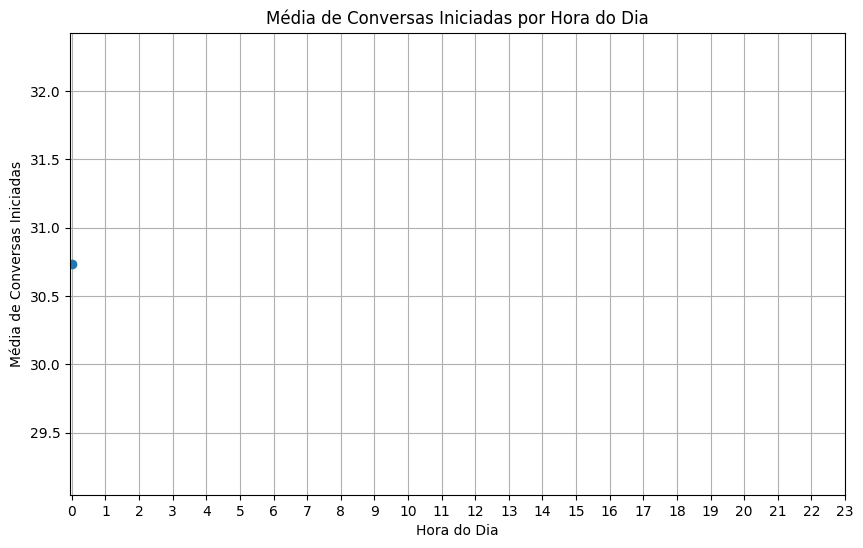

In [21]:
# Converter a coluna 'DATA' para o tipo datetime
df_fila_unidade['DATA'] = pd.to_datetime(df_fila_unidade['DATA'])

# Criar uma cópia do DataFrame
df_fila_unidade_copy = df_fila_unidade.copy()

# Extrair a hora da coluna 'DATA' e adicionar como uma nova coluna
df_fila_unidade_copy['HORA'] = df_fila_unidade_copy['DATA'].dt.hour

# Agrupar os dados por hora e calcular a média de conversas iniciadas em cada hora
df_conversas_por_hora = df_fila_unidade_copy.groupby('HORA').mean()

# Plotar um gráfico de linha para mostrar os padrões de horário
plt.figure(figsize=(10, 6))
plt.plot(df_conversas_por_hora.index, df_conversas_por_hora['CONVERSAS INICIADAS'], marker='o')
plt.title('Média de Conversas Iniciadas por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Média de Conversas Iniciadas')
plt.xticks(range(24))
plt.grid(True)
plt.show()
